Etiquetas originales: [-1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1]
Etiquetas con ruido: [-1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1]


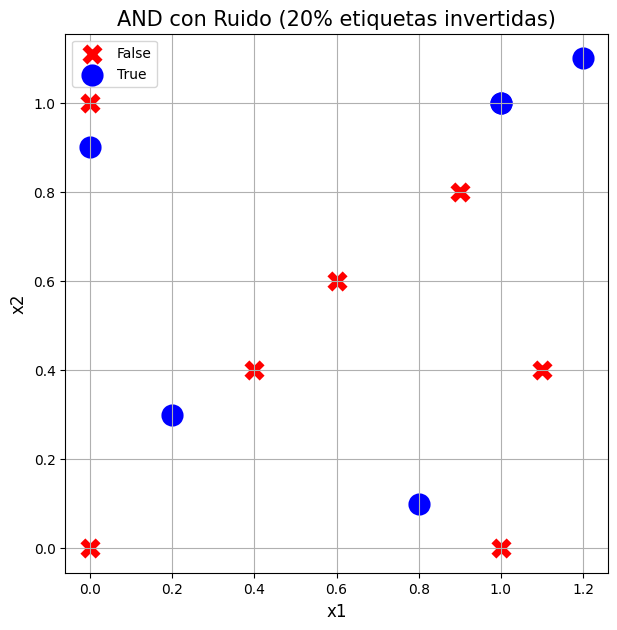


--- Época 1 ---
Error cuadrático total: 9.5126

--- Época 2 ---
Error cuadrático total: 8.5667

--- Época 3 ---
Error cuadrático total: 8.1336

--- Época 4 ---
Error cuadrático total: 7.9030

--- Época 5 ---
Error cuadrático total: 7.7778

--- Época 6 ---
Error cuadrático total: 7.7084

--- Época 7 ---
Error cuadrático total: 7.6688

--- Época 8 ---
Error cuadrático total: 7.6457

--- Época 9 ---
Error cuadrático total: 7.6318

--- Época 10 ---
Error cuadrático total: 7.6231

--- Época 11 ---
Error cuadrático total: 7.6175

--- Época 12 ---
Error cuadrático total: 7.6138

--- Época 13 ---
Error cuadrático total: 7.6114

--- Época 14 ---
Error cuadrático total: 7.6096

--- Época 15 ---
Error cuadrático total: 7.6084


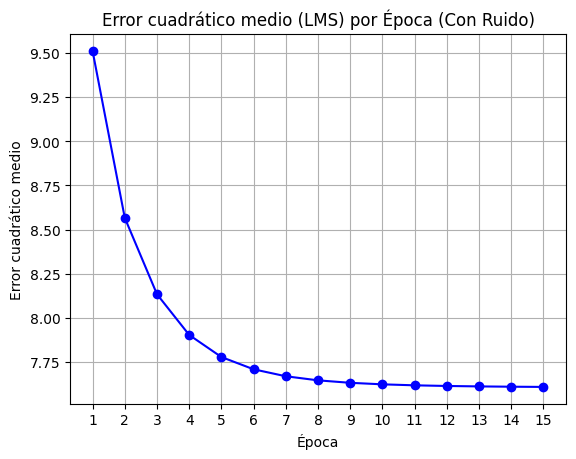

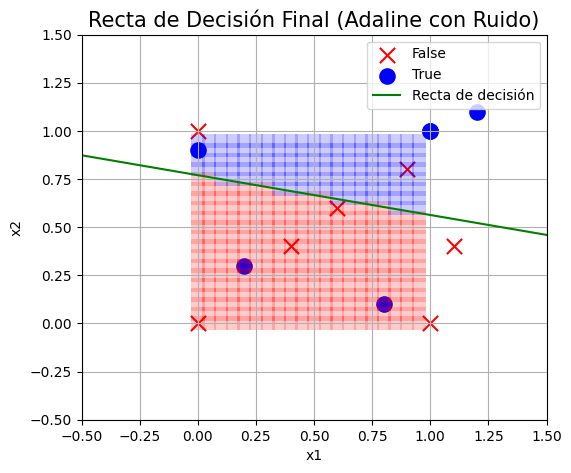

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales (compuerta AND)
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.6],   # Traslape: Clase 1 (True) pero cerca del límite
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                              ])
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, -1, 1, 1, -1, 1])  # 1: True, -1: False

# --- Introducir ruido (20% de etiquetas invertidas) ---
np.random.seed(42)  # Para reproducibilidad
noise_mask = np.random.rand(len(clases)) < 0.2  # Máscara de ruido (20%)
clases_ruidosas = clases.copy()
clases_ruidosas[noise_mask] *= -1  # Invertir etiquetas seleccionadas

print("Etiquetas originales:", clases)
print("Etiquetas con ruido:", clases_ruidosas)

# --- Gráfica de datos con ruido ---
plt.figure(figsize=(7, 7))
plt.title("AND con Ruido (20% etiquetas invertidas)", fontsize=15)
plt.scatter(individuo[clases_ruidosas == -1].T[0], 
            individuo[clases_ruidosas == -1].T[1], 
            marker="x", s=120, color="red", linewidths=5, label="False")
plt.scatter(individuo[clases_ruidosas == 1].T[0],
            individuo[clases_ruidosas == 1].T[1], 
            marker="o", s=120, color="blue", linewidths=5, label="True")
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# --- Parámetros iniciales Adaline ---
w1, w2, b = 0.2, 0.2, 0.2  # Pesos iniciales
pa = 0.2  # Tasa de aprendizaje
numEpocas = 15
error_por_epoca = []

# --- Entrenamiento de Adaline con datos ruidosos ---
for epoca in range(numEpocas):
    suma_errores = 0
    print(f"\n--- Época {epoca + 1} ---")
    
    for i in range(len(individuo)):
        x1, x2 = individuo[i]
        y = w1 * x1 + w2 * x2 + b  # Salida lineal (sin función de activación)
        
        # Error cuadrático
        error = clases_ruidosas[i] - y
        suma_errores += (error ** 2) / 2  # LMS (Least Mean Squares)
        
        # Actualizar pesos y bias (regla Delta)
        w1 += pa * error * x1
        w2 += pa * error * x2
        b += pa * error
    
    error_por_epoca.append(suma_errores)
    print(f"Error cuadrático total: {suma_errores:.4f}")

# --- Gráfica del error cuadrático medio por época ---
plt.plot(range(1, numEpocas + 1), error_por_epoca, marker='o', linestyle='-', color='b')
plt.title("Error cuadrático medio (LMS) por Época (Con Ruido)")
plt.xlabel("Época")
plt.ylabel("Error cuadrático medio")
plt.grid(True)
plt.xticks(range(1, numEpocas + 1))
plt.show()

# --- Gráfica de la recta de decisión final ---
plt.figure(figsize=(6, 5))
plt.title("Recta de Decisión Final (Adaline con Ruido)", fontsize=15)
plt.scatter(individuo[clases_ruidosas == -1].T[0], individuo[clases_ruidosas == -1].T[1], 
            marker="x", s=120, color="red", label="False")
plt.scatter(individuo[clases_ruidosas == 1].T[0], individuo[clases_ruidosas == 1].T[1],
            marker="o", s=120, color="blue", label="True")

# Calcular recta de decisión (w1*x1 + w2*x2 + b = 0)
x_values = np.linspace(-0.5, 1.5, 100)
y_values = (-w1 * x_values - b) / w2  # Despejando x2
plt.plot(x_values, y_values, color="green", label="Recta de decisión")

# Generar y graficar la región de decisión
for x1 in np.arange(0, 1, 0.05):
    for x2 in np.arange(0, 1, 0.05):
        # Calcular el valor de y
        y = (w1 * x1 + w2 * x2) + b
        
        # Función de activación
        if y >= 0:
            color = "blue"  # Clase 1
        else:
            color = "red"   # Clase -1
        
        # Graficar el punto
        plt.scatter(x1, x2, marker="s", s=110,
                    color=color, alpha=0.2, linewidths=0)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()